In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Load raw data
df = pd.read_csv('overview-of-recordings.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   audio_clipping                       6661 non-null   object 
 1   audio_clipping:confidence            6661 non-null   float64
 2   background_noise_audible             6661 non-null   object 
 3   background_noise_audible:confidence  6661 non-null   float64
 4   overall_quality_of_the_audio         6661 non-null   float64
 5   quiet_speaker                        6661 non-null   object 
 6   quiet_speaker:confidence             6661 non-null   float64
 7   speaker_id                           6661 non-null   int64  
 8   file_download                        6661 non-null   object 
 9   file_name                            6661 non-null   object 
 10  phrase                               6661 non-null   object 
 11  prompt                        

In [3]:
#start cleansing
#count duplicate
duplicate=df.duplicated().sum()
print (f'There are', duplicate ,'duplicate .')

There are 0 duplicate .


In [4]:
# collection the texts needed
Text = df[['phrase', 'prompt']]
Text


,phrase,prompt
0,When I remember her I feel down,Emotional pain
1,When I carry heavy things I feel like breaking...,Hair falling out
2,there is too much pain when i move my arm,Heart hurts
3,My son had his lip pierced and it is swollen a...,Infected wound
4,My muscles in my lower back are aching,Infected wound
...,...,...
6656,I feel a burning sensation in my guts about 2 ...,Stomach ache
6657,I have a split on my thumb that will not heal.,Open wound
6658,I feel a lot of pain in the joints.,Joint pain
6659,The area around my heart doesn't feel good.,Heart hurts


In [5]:
import nltk
#nltk.download() 
from nltk.corpus import stopwords
# save English stopwords
stopwords_list = set(stopwords.words("english"))
print(stopwords_list)

{'my', 'just', "you've", 'you', 'o', 'couldn', 'isn', 'do', 's', 're', "wouldn't", 'she', 'this', 'against', 'been', 'ain', "isn't", 'which', 'he', 'as', 'him', 'on', 'shan', 'did', 'further', 'am', 'is', 'out', "couldn't", 'then', "weren't", 'have', 'now', 'because', 'ourselves', 'll', 'under', 'can', 'what', 've', 'up', 'they', 'mightn', 'won', "that'll", 'we', 'where', "didn't", "mightn't", 'theirs', 'who', "shouldn't", 'these', "you'd", 'herself', 'by', 'down', 'when', "aren't", 'of', "mustn't", 'it', 'here', 'all', 'didn', 'his', 'but', 'y', 'our', 'those', 'some', "should've", 'ma', 'into', 'other', 'mustn', 'ours', 'myself', 'a', "you're", 'below', 'yourselves', 'me', 'more', 'i', 'yours', 'for', 'aren', "hadn't", 'their', 'are', 'there', 'doing', 'hasn', "doesn't", 'himself', 'few', 'same', 'between', 'having', "you'll", 'not', 'should', 'hers', 'themselves', 'has', 'if', 'haven', 'about', 'during', 'off', "needn't", 'own', 'was', 'does', 'only', "wasn't", 'were', 'nor', 'm', '

## Clean Text Data

In [6]:
# Clean text data
from nltk.corpus import wordnet as wn 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import string
import re

def phrase_cleanse(phrase):
    #Tokenize and divide phrase into separate words
    token_words = word_tokenize(phrase)
    
    # Convert all texts to lower cases
    words_step1 = []
    for word_1 in token_words:
        words_step1.append(word_1.lower())
    
    #Clear all punctuation
    words_step2 = [] 
    for word_2 in words_step1:
        word_cleaned = re.sub(r'[^\w\s]','',word_2)
        words_step2.append(word_cleaned)
    
    #Clean the text list
    words_step3 = []
    for word_3 in words_step2:
        # check if every characters are alphbets
        if word_3.isalpha():
            # get rid of stop words
            if word_3 not in list(stopwords_list):
                words_step3.append(word_3)
            else:
                continue
    
    #Lemmatization - group different forms of same word which has more than 2 characters into one word
    lem = nltk.stem.WordNetLemmatizer()
    lem_list = []
    for word_4 in words_step3:
        if(len(word_4) > 2):
            lem_list.append(lem.lemmatize(word_4))
    
    join_text = " ".join(lem_list)
    
    return join_text


In [7]:
# Cleaned Data Result
import numpy as np
#Text["new_text"] = Text["phrase"].apply(text_clean)
#Text 
text = np.array(Text.loc[:,'phrase'])
new_text = []
for i in text:
    new_text.append(phrase_cleanse(i))
Text.insert(2,'new_text',new_text)
Text

,phrase,prompt,new_text
0,When I remember her I feel down,Emotional pain,remember feel
1,When I carry heavy things I feel like breaking...,Hair falling out,carry heavy thing feel like breaking back
2,there is too much pain when i move my arm,Heart hurts,much pain move arm
3,My son had his lip pierced and it is swollen a...,Infected wound,son lip pierced swollen skin inside lip grey l...
4,My muscles in my lower back are aching,Infected wound,muscle lower back aching
...,...,...,...
6656,I feel a burning sensation in my guts about 2 ...,Stomach ache,feel burning sensation gut hour meal
6657,I have a split on my thumb that will not heal.,Open wound,split thumb heal
6658,I feel a lot of pain in the joints.,Joint pain,feel lot pain joint
6659,The area around my heart doesn't feel good.,Heart hurts,area around heart feel good


## TF-IDF (Term Frequency-Inverse Document Frequency)

In [8]:
# Use TF-IDF to evaluate how relevant the words are in the file
# tf_idf = tf(word)*idf(word)

from sklearn.feature_extraction.text import TfidfVectorizer

# Create and fit tf_idf model
text_vectorize = TfidfVectorizer()
X_tf_idf = text_vectorize.fit_transform(Text["new_text"])

dense_list = X_tf_idf.todense().tolist()
feature_names = text_vectorize.get_feature_names()
df_tf_idf = pd.DataFrame(dense_list, columns = feature_names)

# concatenate prompt column with tf_idf matrix
text_tf_idf = pd.concat([Text["prompt"], df_tf_idf], axis = 1)
text_tf_idf

#text_tf_idf.to_csv(f"tf_idf.csv", index=False)

,prompt,abdomen,abdominal,able,abronchial,accident,accidentally,accompanied,ache,aching,...,wound,wrap,write,wrong,yard,year,yellow,yesterday,young,zit
0,Emotional pain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hair falling out,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Heart hurts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Infected wound,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Infected wound,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.593903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6656,Stomach ache,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6657,Open wound,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6658,Joint pain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6659,Heart hurts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## HashingVectorizer

In [9]:
# Use hashing vectorizer to consider the importance of counts and frequencies of words
# carefully initiate the pre-defined matrix size. 
#Small numbers of features are likely to cause hash collisions
#large numbers will cause larger coefficient dimensions in linear learners
# good for large dataset since it don't store the vocabulary and easily been loaded when needed

from sklearn.feature_extraction.text import HashingVectorizer

# determine the size of matrix and generate hash vectorizer
n = Text['prompt'].nunique()
text_hashvectorize = HashingVectorizer(n_features = n*3)
X_hash = text_hashvectorize.fit_transform(Text["new_text"])

df_hash_vectorize = pd.DataFrame(X_hash.toarray())

# concatenate prompt column with hash vectorized matrix
text_hash_vectorize = pd.concat([Text["prompt"], df_hash_vectorize], axis = 1)
text_hash_vectorize

#text_hash_vectorize.to_csv(f"hash_vectorize.csv", index=False)

,prompt,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,Emotional pain,0.0,0.0,0.0,0.000000,0.000000,-0.707107,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,Hair falling out,0.0,0.0,0.0,-0.377964,0.000000,-0.377964,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,Heart hurts,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,Infected wound,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.534522,0.0,0.00000,0.000000,0.0,0.0,0.0,-0.534522,0.0,0.0
4,Infected wound,0.0,0.0,0.0,0.000000,0.500000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6656,Stomach ache,0.0,0.0,0.0,0.000000,0.000000,-0.353553,0.0,0.0,0.353553,...,0.000000,0.0,0.00000,0.707107,0.0,0.0,0.0,0.353553,0.0,0.0
6657,Open wound,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,-0.57735,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
6658,Joint pain,0.5,0.0,0.0,0.000000,0.000000,-0.500000,0.0,0.0,0.000000,...,0.000000,0.5,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
6659,Heart hurts,0.0,0.0,0.0,-0.447214,0.447214,-0.447214,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


## CountVectorizer (Bag of Words)

In [10]:
# bag_of_words feature extract

from sklearn.feature_extraction.text import CountVectorizer

# extract feature using bag_of_words
bag_word = CountVectorizer()
feature_bow = bag_word.fit_transform(Text["new_text"].values)

# maping feature 
df_bow = pd.DataFrame(feature_bow.todense().tolist(), columns = bag_word.get_feature_names())

# concatenate prompt column with bow matrix
bag_word_df = pd.concat([Text['prompt'], df_bow], axis = 1)
bag_word_df

#bag_word_df.to_csv('bag_word_df.csv',index=False)

,prompt,abdomen,abdominal,able,abronchial,accident,accidentally,accompanied,ache,aching,...,wound,wrap,write,wrong,yard,year,yellow,yesterday,young,zit
0,Emotional pain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hair falling out,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Heart hurts,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Infected wound,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Infected wound,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6656,Stomach ache,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6657,Open wound,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6658,Joint pain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6659,Heart hurts,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Word2Vec

In [11]:
# word to vec
# using the Word2Vec algorithm with our corpus
# it returns a vector representation for each word
# to extend these word vectors and generate vectors on document level
# we compute an average of all the words in the document 

from gensim.models import Word2Vec

# Create the list of list format for gensim modeling 
Text['new_text_clean'] = Text['new_text'].apply(lambda x: x.split(" "))

# Train the word2vec model
w2v_model = Word2Vec(Text['new_text_clean'], min_count = 1,vector_size = 100, window = 5)

# Take the average of the word vectors for the words contained in each sentence
def word_avg_vect(data, model, num_features):
    words = set(model.wv.index_to_key)
    X_vect = np.array([np.array([model.wv[i] for i in s if i in words]) for s in data])
    X_vect_avg = []
    for v in X_vect:
        if v.size:
            X_vect_avg.append(v.mean(axis = 0))
        else:
            X_vect_avg.append(np.zeros(num_features, dtype = float))

    df_vect_avg = pd.DataFrame(X_vect_avg)
    return df_vect_avg

X_w2v = word_avg_vect(Text['new_text_clean'], w2v_model, 100)
# concatenate prompt column with averaged w2v matrix
df_w2v = pd.concat([Text["prompt"], X_w2v], axis = 1)
df_w2v

#df_w2v.to_csv(f"df_w2v.csv", index=False)

,prompt,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,Emotional pain,-0.076306,0.144870,0.083767,0.095612,0.066345,-0.226576,0.062405,0.405740,-0.126576,...,0.176404,0.113494,0.057781,0.016227,0.233634,0.097241,0.095603,-0.143557,0.059992,-0.057431
1,Hair falling out,-0.129883,0.241534,0.109110,0.142094,0.119210,-0.391520,0.095924,0.651806,-0.195424,...,0.297623,0.181590,0.079316,0.022262,0.362759,0.156125,0.161772,-0.229045,0.110560,-0.102366
2,Heart hurts,-0.138489,0.248988,0.117522,0.148499,0.124959,-0.413804,0.112814,0.685549,-0.227354,...,0.313381,0.186616,0.080913,0.023393,0.373568,0.158586,0.175424,-0.229141,0.104984,-0.111788
3,Infected wound,-0.133123,0.237146,0.101629,0.131735,0.109698,-0.401296,0.086977,0.651547,-0.183476,...,0.297889,0.185091,0.068119,0.004698,0.345084,0.155465,0.173034,-0.211400,0.103105,-0.107905
4,Infected wound,-0.151671,0.268915,0.121587,0.152607,0.134066,-0.438037,0.122253,0.726806,-0.223599,...,0.338446,0.204209,0.077224,0.024273,0.405920,0.180556,0.188474,-0.251705,0.119200,-0.121408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6656,Stomach ache,-0.115034,0.212170,0.102355,0.127260,0.111012,-0.356944,0.088314,0.597305,-0.175593,...,0.266632,0.163279,0.060654,0.009344,0.324350,0.141180,0.152941,-0.196083,0.092586,-0.085266
6657,Open wound,-0.082318,0.157860,0.067382,0.077496,0.079493,-0.261548,0.057403,0.424254,-0.119038,...,0.188105,0.113617,0.041503,0.008333,0.222731,0.104138,0.115030,-0.143077,0.069211,-0.070054
6658,Joint pain,-0.131884,0.256373,0.128843,0.154810,0.125906,-0.405019,0.116038,0.680855,-0.219588,...,0.304285,0.186892,0.076803,0.021421,0.373776,0.150687,0.167834,-0.229338,0.108377,-0.089778
6659,Heart hurts,-0.110055,0.223382,0.098995,0.134150,0.111787,-0.366419,0.095155,0.613407,-0.187147,...,0.274841,0.174951,0.079736,0.016118,0.335088,0.144033,0.159089,-0.211854,0.105012,-0.087460


## PCA 

In [12]:
# fucntion for PCA as feature selection 
# set cutoff value is number of components that represents 99% of variance 
# return reduced dataset with appropriate PCA components represented 99% variance
from sklearn.decomposition import PCA
import pickle
def PCA_project(data, data_name="", threshold = 99):
    max_component = data.shape[1]
    cutoff = threshold
    covar_matrix = PCA(n_components = max_component)
    covar_matrix.fit(data)
    variance = covar_matrix.explained_variance_ratio_
    var = np.cumsum(np.round(variance, decimals = 4)*100)
    index = 0
    for i in range(len(var)):
        
        if np.round(var[i]) < cutoff:
            index += 1
        else:
            break
    principal=PCA(n_components=index)
    principal.fit(data)
    pickle.dump(principal, open(data_name+'.pkl','wb'))
    print('%s reduce features from %d to %d'% (data_name,max_component, index))
    return principal.transform(data)

In [13]:
#apply PCA on our 4 dataset:bag of words, tf_idf, hash, word2vec
bow_P= PCA_project(df_bow, 'bag of words')
tf_idf_P= PCA_project(df_tf_idf, 'tf_idf')
hash_P= PCA_project(df_hash_vectorize, 'hash_vectorize')
w2v_P= PCA_project(np.array(X_w2v), 'word2vec')

bag of words reduce features from 953 to 464
tf_idf reduce features from 953 to 507
hash_vectorize reduce features from 75 to 69
word2vec reduce features from 100 to 8


## Split Data

In [14]:
#split data
from sklearn.model_selection import train_test_split
y = Text["prompt"]
X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(bow_P,y,test_size = 0.2, random_state =3, stratify = y)
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(tf_idf_P,y,test_size = 0.2, random_state =3, stratify = y)
X_hash_train, X_hash_test, y_hash_train, y_hash_test = train_test_split(hash_P,y,test_size = 0.2, random_state =3, stratify = y)
X_w2v_train, X_w2v_test, y_w2v_train, y_w2v_test = train_test_split(w2v_P,y,test_size = 0.2, random_state =3, stratify = y)

## Modeling and Evaluation

In [15]:
#define a funtion to generate a nice matric table
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
def matric_table(model_list, name_list,y_data, X_data):
    result = []
    for m,n,a,b in zip(model_list, name_list, y_data, X_data):
        report = []
        report.append(n)
        report.append(accuracy_score(a[0], m.predict(b[0])) * 100)
        report.append(accuracy_score(a[1], m.predict(b[1])) * 100)
        report.append(recall_score(a[1], m.predict(b[1]),average = 'weighted') * 100)
        report.append(precision_score(a[1], m.predict(b[1]),average = 'weighted') * 100)
        report.append(f1_score(a[1], m.predict(b[1]),average = 'weighted') * 100)
        result.append(report)
    df = pd.DataFrame(data = result, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Testing precision %', 'Testing recall %', 'Testing f1_score %'])
    df = df.set_index('Model')
    return df.style.highlight_max(color = 'lightgreen', axis = 0)

In [16]:
#train model for randomforest
from sklearn.ensemble import RandomForestClassifier
# train model with all features
rf_bow = RandomForestClassifier(n_estimators=100,
                                max_features=None,
                                oob_score=True,
                                n_jobs=-1,
                                random_state=0)
rf_tf = RandomForestClassifier(n_estimators=100,
                                max_features=None,
                                oob_score=True,
                                n_jobs=-1,
                                random_state=0)
rf_hash = RandomForestClassifier(n_estimators=100,
                                max_features=None,
                                oob_score=True,
                                n_jobs=-1,
                                random_state=0)
rf_w2v = RandomForestClassifier(n_estimators=100,
                                max_features=None,
                                oob_score=True,
                                n_jobs=-1,
                                random_state=0)

rf_bow.fit(X_bow_train, y_bow_train)
rf_tf.fit(X_tf_train, y_tf_train)
rf_hash.fit(X_hash_train, y_hash_train)
rf_w2v.fit(X_w2v_train, y_w2v_train)

RandomForestClassifier(max_features=None, n_jobs=-1, oob_score=True,
                       random_state=0)

### Random Forest with word2vec extracted data is the best among all Random Forest Classifers

In [17]:
# print result
model_list = [rf_bow,rf_tf,rf_hash,rf_w2v]
name_list = ["Random Forest with bow","Random Forest with tf_idf", "Random Forest with hash","Random Forest with word2vec"]
y_data = [[y_bow_train,y_bow_test], [y_tf_train,y_tf_test], [y_hash_train,y_hash_test],[y_w2v_train,y_w2v_test]]
X_data = [[X_bow_train,X_bow_test], [X_tf_train,X_tf_test], [X_hash_train,X_hash_test],[X_w2v_train,X_w2v_test]]
matric_table(model_list, name_list, y_data, X_data)

,Training Accuracy %,Testing Accuracy %,Testing precision %,Testing recall %,Testing f1_score %
Model,,,,,
Random Forest with bow,99.774775,99.549887,99.549887,99.574821,99.549617
Random Forest with tf_idf,99.774775,99.549887,99.549887,99.574821,99.549617
Random Forest with hash,99.493243,99.174794,99.174794,99.194755,99.176006
Random Forest with word2vec,99.774775,99.549887,99.549887,99.574932,99.549645


In [18]:
#train model for logistic Regression which is not inherently multiclass classifers. 
#In this case, we use  defualt auto setting that if input is binary using OVR otherwise using multnomial
from sklearn.linear_model import LogisticRegression

lr_bow = LogisticRegression()
lr_tf = LogisticRegression()
lr_hash = LogisticRegression()
lr_w2v = LogisticRegression()

lr_bow.fit(X_bow_train, y_bow_train)
lr_tf.fit(X_tf_train, y_tf_train)
lr_hash.fit(X_hash_train, y_hash_train)
lr_w2v.fit(X_w2v_train, y_w2v_train)

LogisticRegression()

### Logistic Regression with bag-of-words extracted data is the best among all logistic Regression Classifers

In [19]:
# print result, the warning indicate there are some type the classifers never predict. but since data is imbalence in that rare class so the accuracy won't be impacted
model_list = [lr_bow,lr_tf,lr_hash,lr_w2v]
name_list = ["Logistic Regression with bow","Logistic Regression with tf_idf", "Logistic Regression with hash","Logistic Regressiont with word2vec"]
y_data = [[y_bow_train,y_bow_test], [y_tf_train,y_tf_test], [y_hash_train,y_hash_test],[y_w2v_train,y_w2v_test]]
X_data = [[X_bow_train,X_bow_test], [X_tf_train,X_tf_test], [X_hash_train,X_hash_test],[X_w2v_train,X_w2v_test]]
matric_table(model_list, name_list, y_data, X_data)

,Training Accuracy %,Testing Accuracy %,Testing precision %,Testing recall %,Testing f1_score %
Model,,,,,
Logistic Regression with bow,99.568318,99.549887,99.549887,99.574027,99.549153
Logistic Regression with tf_idf,99.399399,99.474869,99.474869,99.500348,99.474060
Logistic Regression with hash,85.904655,84.696174,84.696174,85.447843,84.617119
Logistic Regressiont with word2vec,27.496246,27.906977,27.906977,22.557786,20.560358


In [20]:
#train model for linear svm, which is not inherently multiclass classifers. 
#In this case, we use One VS Rest to save computing 
from sklearn.svm import SVC

svc_bow = SVC(decision_function_shape='ovr')
svc_tf = SVC(decision_function_shape='ovr')
svc_hash = SVC(decision_function_shape='ovr')
svc_w2v = SVC(decision_function_shape='ovr')

svc_bow.fit(X_bow_train, y_bow_train)
svc_tf.fit(X_tf_train, y_tf_train)
svc_hash.fit(X_hash_train, y_hash_train)
svc_w2v.fit(X_w2v_train, y_w2v_train)

SVC()

### Support Vectors Machine with tf_idf extracted data is the best among all SVCs 

In [21]:
# print result
model_list = [svc_bow,svc_tf,svc_hash,svc_w2v]
name_list = ["SVC with bow","SVC with tf_idf", "SVC with hash","SVC with word2vec"]
y_data = [[y_bow_train,y_bow_test], [y_tf_train,y_tf_test], [y_hash_train,y_hash_test],[y_w2v_train,y_w2v_test]]
X_data = [[X_bow_train,X_bow_test], [X_tf_train,X_tf_test], [X_hash_train,X_hash_test],[X_w2v_train,X_w2v_test]]
matric_table(model_list, name_list, y_data, X_data)

,Training Accuracy %,Testing Accuracy %,Testing precision %,Testing recall %,Testing f1_score %
Model,,,,,
SVC with bow,99.587087,99.549887,99.549887,99.574027,99.549153
SVC with tf_idf,99.605856,99.549887,99.549887,99.574027,99.549153
SVC with hash,99.324324,99.174794,99.174794,99.249930,99.176335
SVC with word2vec,46.677928,43.735934,43.735934,45.756499,42.670226


In [22]:
#train model for KNN
from sklearn.neighbors import KNeighborsClassifier

knn_bow = KNeighborsClassifier(n_neighbors=3)
knn_tf = KNeighborsClassifier(n_neighbors=3)
knn_hash = KNeighborsClassifier(n_neighbors=3)
knn_w2v = KNeighborsClassifier(n_neighbors=3)

knn_bow.fit(X_bow_train, y_bow_train)
knn_tf.fit(X_tf_train, y_tf_train)
knn_hash.fit(X_hash_train, y_hash_train)
knn_w2v.fit(X_w2v_train, y_w2v_train)

KNeighborsClassifier(n_neighbors=3)

### K Nearest Neighours with bag-of-words extracted data is the best among all KNNs 

In [23]:
model_list = [knn_bow,knn_tf,knn_hash,knn_w2v]
name_list = ["KNN with bow","KNN with tf_idf", "KNN with hash","KNN with word2vec"]
y_data = [[y_bow_train,y_bow_test], [y_tf_train,y_tf_test], [y_hash_train,y_hash_test],[y_w2v_train,y_w2v_test]]
X_data = [[X_bow_train,X_bow_test], [X_tf_train,X_tf_test], [X_hash_train,X_hash_test],[X_w2v_train,X_w2v_test]]
matric_table(model_list, name_list, y_data, X_data)

,Training Accuracy %,Testing Accuracy %,Testing precision %,Testing recall %,Testing f1_score %
Model,,,,,
KNN with bow,99.699700,99.699925,99.699925,99.708187,99.699770
KNN with tf_idf,99.831081,99.699925,99.699925,99.708048,99.699734
KNN with hash,99.418168,99.324831,99.324831,99.370567,99.326532
KNN with word2vec,99.643393,99.549887,99.549887,99.574682,99.549582


In [24]:
#train model for Naive Bayes. 
#Bernoulli NB can only focus on a single keyword, 
#but will also count how many times that keyword does not occur in the document
from sklearn.naive_bayes import GaussianNB


gnb_bow = GaussianNB()
gnb_tf = GaussianNB()
gnb_hash = GaussianNB()
gnb_w2v = GaussianNB()

gnb_bow.fit(X_bow_train, y_bow_train)
gnb_tf.fit(X_tf_train, y_tf_train)
gnb_hash.fit(X_hash_train, y_hash_train)
gnb_w2v.fit(X_w2v_train, y_w2v_train)

GaussianNB()

### Gauissian Naive Bayes with tf_idf extracted data is the best among all BNBs 

In [25]:
model_list = [gnb_bow,gnb_tf,gnb_hash,gnb_w2v]
name_list = ["Gaussian Naive Bayes with bow","Gaussian Naive Bayes with tf_idf", "Gaussian Naive Bayes with hash","Gaussian Naive Bayes with word2vec"]
y_data = [[y_bow_train,y_bow_test], [y_tf_train,y_tf_test], [y_hash_train,y_hash_test],[y_w2v_train,y_w2v_test]]
X_data = [[X_bow_train,X_bow_test], [X_tf_train,X_tf_test], [X_hash_train,X_hash_test],[X_w2v_train,X_w2v_test]]
matric_table(model_list, name_list, y_data, X_data)

,Training Accuracy %,Testing Accuracy %,Testing precision %,Testing recall %,Testing f1_score %
Model,,,,,
Gaussian Naive Bayes with bow,90.653153,87.546887,87.546887,89.318237,87.667300
Gaussian Naive Bayes with tf_idf,90.878378,87.921980,87.921980,90.570234,88.415025
Gaussian Naive Bayes with hash,79.298048,75.843961,75.843961,77.614749,76.140452
Gaussian Naive Bayes with word2vec,47.184685,48.012003,48.012003,50.995666,48.054367


### In conclusion, KNN with bage of words dataset is the winner among all classifers with highest score on test accuracy, precision, recall and F1 scores, The Random Forest is best on the Training accuracy. 

In [32]:
### Find the best classifer among all classifers
model_list = [rf_w2v,lr_bow,svc_tf,knn_bow,gnb_tf]
name_list = ["Random Forest with w2v","Logistic Regression with bow", "SVC with tf","KNN withbow","gaussian Naive Bayes with tf"]
y_data = [[y_w2v_train,y_w2v_test], [y_bow_train,y_bow_test], [y_tf_train,y_tf_test],[y_bow_train,y_bow_test],[y_tf_train,y_tf_test]]
X_data = [[X_w2v_train,X_w2v_test], [X_bow_train,X_bow_test], [X_tf_train,X_tf_test],[X_bow_train,X_bow_test],[X_tf_train,X_tf_test]]
matric_table(model_list, name_list, y_data, X_data)

,Training Accuracy %,Testing Accuracy %,Testing precision %,Testing recall %,Testing f1_score %
Model,,,,,
Random Forest with w2v,99.774775,99.549887,99.549887,99.574932,99.549645
Logistic Regression with bow,99.568318,99.549887,99.549887,99.574027,99.549153
SVC with tf,99.605856,99.549887,99.549887,99.574027,99.549153
KNN withbow,99.699700,99.699925,99.699925,99.708187,99.699770
gaussian Naive Bayes with tf,90.878378,87.921980,87.921980,90.570234,88.415025


In [34]:
##Further tuning the KNN  classifer with bow
best_models = []
n_neighbors = [3,5,7,9]
weights = ['uniform','distance']
ps = [1,2]

def KNN_clf(n_neighbors, weight, p):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weight,p = p)
    knn.fit(X_bow_train, y_bow_train)
    y_pred = knn.predict(X_bow_test)
    n = accuracy_score(y_bow_test,y_pred)
    best_models.append((n_neighbors, weight, p ,n))

for c in n_neighbors:
    for w in weights:
        for p in ps:
            KNN_clf(c, w, p)

print(max(best_models,key=lambda item:item[3]))

(3, 'uniform', 1, 0.9969992498124531)


In [33]:
##Further tuning the random forest classifer with w2v
best_models = []
crit = ['gini', 'entropy']
max_d = range(1,20,4)
min_s_leaf = range(1,20,4)
n_est = [50, 100, 200]

def RF_clf(crit, max_d, min_s_leaf, n_est):
    forest = RandomForestClassifier(criterion=crit, max_depth=max_d, min_samples_leaf=min_s_leaf, n_estimators=n_est, random_state=1)
    forest.fit(X_w2v_train, y_w2v_train)
    y_pred = forest.predict(X_w2v_test)
    n = accuracy_score(y_w2v_test,y_pred)
    best_models.append((crit,max_d,min_s_leaf,n_est,n))


for c in crit:
    for md in max_d:
        for msl in min_s_leaf:
            for n_e in n_est:
                RF_clf(c, md, msl, n_e)

print(max(best_models,key=lambda item:item[4]))

('gini', 13, 1, 50, 0.9969992498124531)


### After tuning the Random Forest and KNN, Random Forest indeed is the best performance classifer

In [35]:
Knn_best = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform' ,p = 1)
Rf_best = RandomForestClassifier(criterion='gini', max_depth=13, min_samples_leaf=1, n_estimators=50, random_state=1)
Knn_best.fit(X_bow_train, y_bow_train)
Rf_best.fit(X_w2v_train, y_w2v_train)

model_list = [Knn_best, Rf_best]
name_list = ["Tuned KNN", 'Tuned Randome Forest']
y_data = [[y_bow_train,y_bow_test], [y_w2v_train,y_w2v_test] ]
X_data = [[X_bow_train,X_bow_test], [X_w2v_train,X_w2v_test]]
matric_table(model_list, name_list, y_data, X_data)

,Training Accuracy %,Testing Accuracy %,Testing precision %,Testing recall %,Testing f1_score %
Model,,,,,
Tuned KNN,99.699700,99.699925,99.699925,99.708048,99.699734
Tuned Randome Forest,99.774775,99.699925,99.699925,99.708048,99.699734


## Draw The ROC and Recall-Precision Graphs to compare

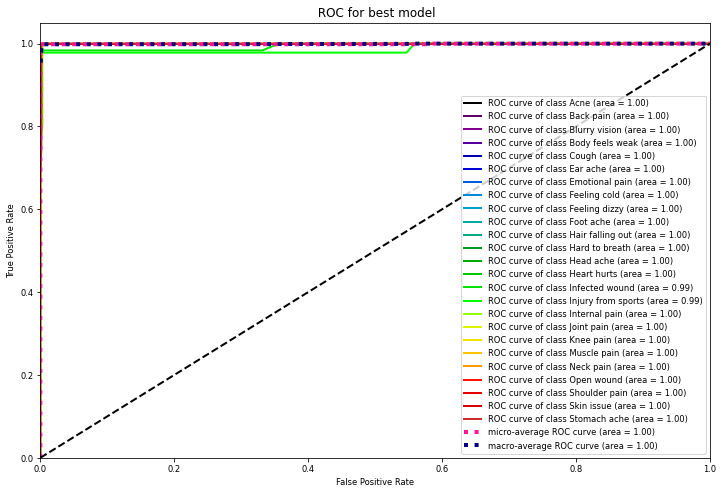

In [36]:
# too perfect, maybe we don't need graph just use our table to explain
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc(y_w2v_test, Rf_best.predict_proba(X_w2v_test)
                                          ,text_fontsize = 'small'
                                          ,title = ' ROC for best model'
                                          ,figsize = (12,8))
plt.show()

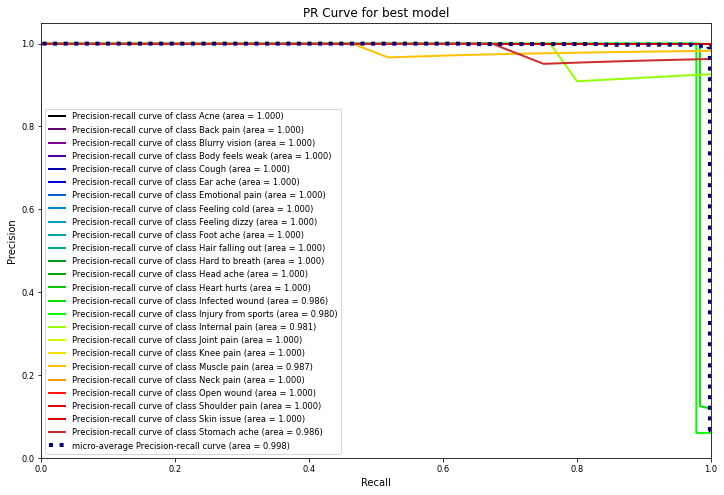

In [37]:
skplt.metrics.plot_precision_recall_curve(y_w2v_test, Rf_best.predict_proba(X_w2v_test),
                                          text_fontsize = 'small'
                                          ,title = 'PR Curve for best model'
                                          ,figsize = (12,8))
plt.show()

## Deployment: building a pipeline to automatically preprose the text and make classification

In [38]:
#save required model for deployment
pickle.dump(Rf_best, open('bestmodel.pkl','wb'))
pickle.dump(w2v_model, open('w2v_model.pkl','wb'))

In [39]:
raw_input = input()

def input_process(data):
    input_clean = phrase_cleanse(data)
    w2v_model = pickle.load(open('w2v_model.pkl', 'rb'))
    input_clean = [input_clean.split(" ")]
    processed_input = word_avg_vect(input_clean, w2v_model, 100)
    pca_model = pickle.load(open('word2vec.pkl', 'rb')) 
    test = pca_model.transform(processed_input)
    return test

def pred(data):
    test = input_process(data)
    model = pickle.load(open('bestmodel.pkl', 'rb'))
    prediction = model.predict(test)
    return prediction

pred(raw_input)

I have cut my finger because of playing football and I have to apply pain relief cream but it does not help


array(['Injury from sports'], dtype=object)